<a href="https://colab.research.google.com/github/gkaahara/studies/blob/master/Trabalho_de_Data_Sciente_Sentimento_de_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Reviews da Steam para Identificação de Palavras Comuns


---


Neste notebook, realizaremos uma análise exploratória de um dataset contendo reviews de jogos na plataforma Steam. O objetivo deste estudo é identificar as palavras mais comuns presentes nas análises positivas e negativas. Ao longo da análise, iremos pré-processar os dados textuais, removendo ruídos como pontuações e stop words, e, em seguida, utilizaremos técnicas de contagem de frequência para destacar as palavras mais frequentemente usadas nas duas categorias de reviews. Esta abordagem nos permitirá entender melhor os padrões de feedback dos usuários e pode fornecer insights valiosos para desenvolvedores e marqueteiros na indústria de jogos.

##Importação de bibliotecas necessárias:
Como as reviews são em inglês, foi necessário adicionar esta biblioteca para detecção de palavras-chave do idioma.

In [ ]:
!pip install nltk emoji matplotlib seaborn wordcloud  # Instala as bibliotecas
import emoji
import pandas as pd
import numpy as np
import re
import string
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('vader_lexicon')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##Carregamento de dataset:

In [ ]:
df_review = pd.read_csv('/content/output.csv')

##Remoção de valores nulos:

In [ ]:
df_review.dropna(subset=['content'], inplace=True)

##Mapeamento de reviews:
O código abaixo verifica quais os tipos de review podem existir na coluna 'is_positive' e mapeia-as em valores binários para facilitar a análise;

In [ ]:
print(df_review['is_positive'].unique())  # Verifica valores únicos
mapping = {'Positive': 1, 'Negative': 0}  # Cria dicionário de mapeamento
df_review['is_positive'] = df_review['is_positive'].map(mapping)

['Negative' 'Positive']


#Pré-processamento dos textos:
Processando o texto para remover números, espaços, pontuação, emojis, conversão para minúsculas e remoção de stop words.

In [ ]:
def preprocess_text(text):
  text = emoji.demojize(text)
  text = text.lower() # Converter para minúsculas
  text = re.sub(r'[\d' + string.punctuation + ']+', '', text) # Remove pontuação e números
  text = text.strip() # Remover espaços em branco extras
  text = ' '.join(word for word in text.split() if word not in stop_words)
  return text

print(df_review['content'].str.len().value_counts())

content
4       5309
9       4640
7       4533
3       4400
8       3610
        ... 
2620       1
1814       1
7989       1
4300       1
6800       1
Name: count, Length: 2967, dtype: int64


#Aplicar pré-processamento na coluna de conteúdo:

In [ ]:
df_review['content'] = df_review['content'].apply(preprocess_text)

df_review.head()

,id,app_id,content,author_id,is_positive
0,181331361,100,least counter strike,76561199556485100,0
1,180872601,100,uh far playthrough great glitched textures con...,76561199230620391,0
2,177836246,100,better mechanics cs,76561198417690647,0
3,177287444,100,buggy mess fun play,76561199077268730,0
4,176678990,100,whoever came gonna fucking get negative review...,76561199104544266,0


#Análise de sentimento dos textos:
Foi utilizada a biblioteca VADER (Valence Aware Dictionary and sEntiment Reasoner), que se destaca pela eficácia em analisar textos curtos;

In [ ]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
         scores = analyzer.polarity_scores(text)
         return scores['compound']

#Retorna o score composto (compound):
É uma medida geral do sentimento do texto. Esse score varia de -1 (muito negativo) a 1 (muito positivo).

In [ ]:
df_review['sentiment'] = df_review['content'].apply(get_sentiment)

#Separar reviews entre positivas e negativas:

In [ ]:
positive_reviews = df_review[df_review['is_positive'] == 1]['content']
negative_reviews = df_review[df_review['is_positive'] == 0]['content']

print(len(positive_reviews))
print(len(negative_reviews))

102377
98346


#Contar a frequência das palavras em reviews positivas e negativas:

In [ ]:
positive_word_counts = Counter(" ".join(positive_reviews).split())
negative_word_counts = Counter(" ".join(negative_reviews).split())

#Obter as 10 palavras mais comuns em reviews positivas e negativas:

In [ ]:
common_positive_words = positive_word_counts.most_common(10)
common_negative_words = negative_word_counts.most_common(10)

#Histograma com Seaborn:
Elaboração de gráficos para exibir a distribuição de scores de sentimento, assim como gráficos das palavras mais comuns em reviews positivas e negativas;

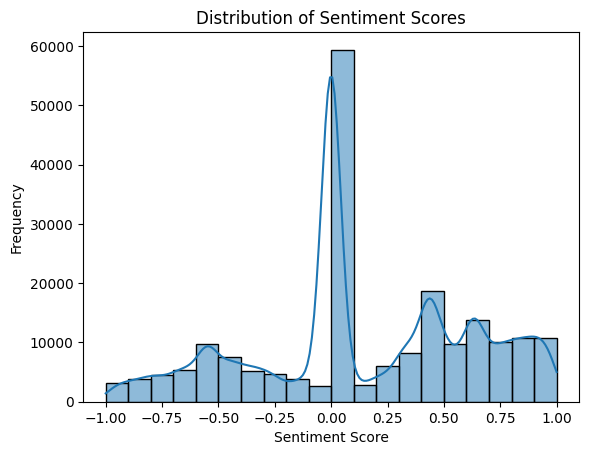

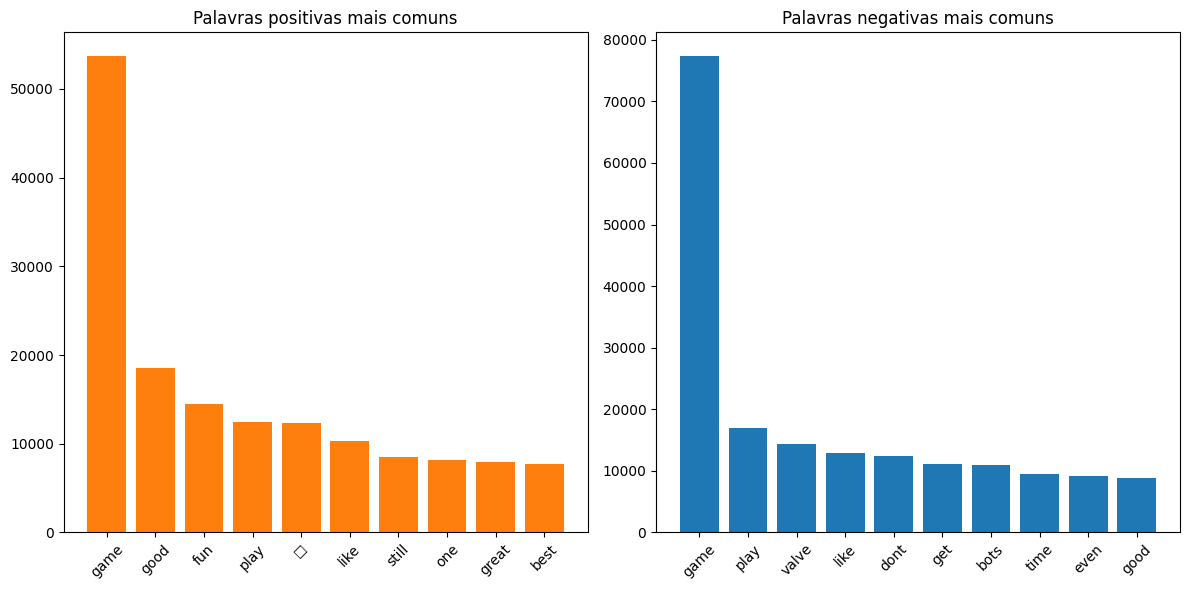

In [ ]:
sns.histplot(df_review['sentiment'], bins=20, kde=True)

# Define os títulos e labels
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Exibe o gráfico
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].bar(*zip(*common_positive_words))
axs[0].bar([word for word, count in common_positive_words], [count for word, count in common_positive_words])
axs[0].set_title('Palavras positivas mais comuns')
axs[0].tick_params(axis='x', rotation=45)
axs[1].bar([word for word, count in common_negative_words], [count for word, count in common_negative_words])
axs[1].set_title('Palavras negativas mais comuns')
axs[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Verifica se a variável de palavras positivas está vazia antes de plotar:
if common_positive_words:
    axs[0].bar([word for word, count in common_positive_words], [count for word, count in common_positive_words])
    axs[0].set_title('Palavras positivas mais comuns')
    axs[0].tick_params(axis='x', rotation=45)
else:
    print("Sem palavras positivas para plotar.")

# Verifica se a variável de palavras negativas está vazia antes de plotar:
if common_negative_words:
    axs[1].bar([word for word, count in common_negative_words], [count for word, count in common_negative_words])
    axs[1].set_title('Palavras negativas mais comuns')
    axs[1].tick_params(axis='x', rotation=45)
else:
    print("Sem palavras negativas para plotar.")

#WordCloud:
Elaboração de uma nuvem de palavras mostrando as palavras mais presentes no dataset;

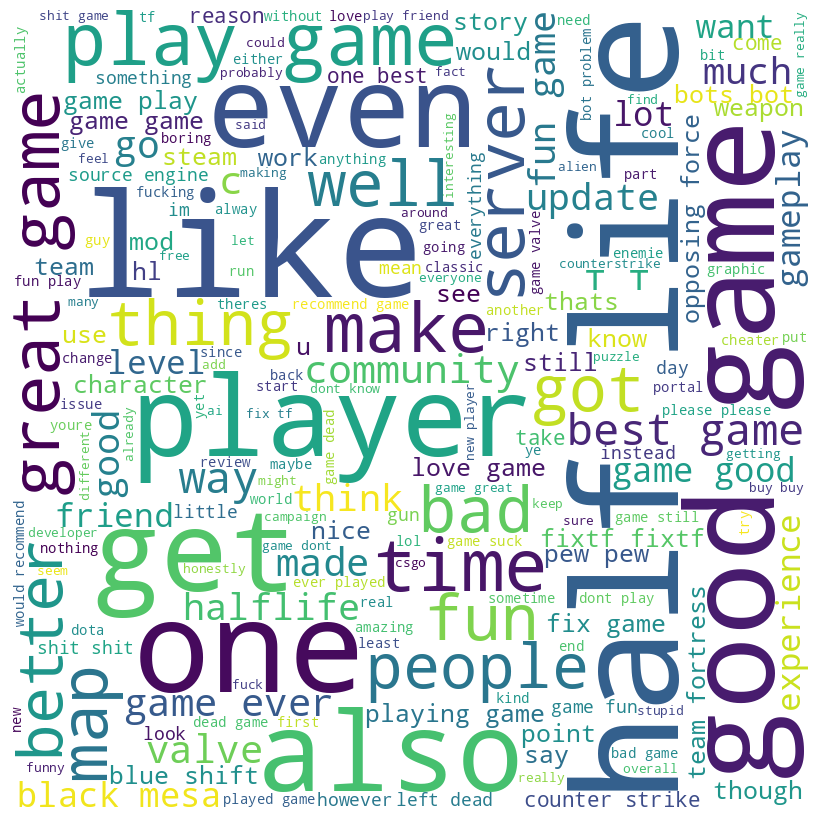

In [ ]:
# Combina todas as reviews em uma só string:
all_reviews = " ".join(df_review['content'])

# Cria um objeto WordCloud:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(all_reviews)

# Plot da imagem resultante:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()